# Практика 7.1 Моделироваине переходов. Цепи Маркова.
## Задание
Матрица перехода для цепи Мамркова имеет вид:
$$
Q =
\begin{pmatrix}
0.4 & 0.6 \\
0.3 & 0.7
\end{pmatrix}
$$
Распределение вероятности по состояниея на начальный момент времени P(0.1, 0.9). Найти:
* Матрицу перехода за 2 шага.
* Распределение вероятностей по состояниям после 2-го шага.
* Стационарное распределение вероятностей по состояниям.


In [ ]:
import numpy as np

# 1. Задаем матрицу перехода P
P = np.array([[0.3, 0.7],
              [0.4, 0.6]])

# 2. Задаем начальное распределение вероятностей P0
P0 = np.array([0.1, 0.9])

# --- 1) Находим матрицу перехода за 2 шага (P^2) ---
P2 = np.linalg.matrix_power(P, 2)
print(f"1) Матрица перехода за 2 шага (P^2):\n{P2}\n")

# --- 2) Находим распределение вероятностей после 2-го шага (P0 * P2) ---
# Умножение вектора-строки на матрицу
P_after_2_steps = P0 @ P2  # Оператор @ для матричного умножения в NumPy
# Или: P_after_2_steps = np.dot(P0, P2)
print(f"2) Распределение вероятностей после 2-го шага (P0 * P2):\n{P_after_2_steps}\n")

# --- 3) Находим стационарное распределение (pi * P = pi, sum(pi) = 1) ---

# Стационарное распределение pi удовлетворяет уравнению pi * P = pi.
# Это можно переписать как pi * (P - I) = 0, где I - единичная матрица.
# Это эквивалентно (P^T - I^T) * pi^T = 0, где I^T = I, а pi^T - транспонированный вектор pi.
# В виде системы линейных уравнений: (P^T - I) * pi^T = 0

# Транспонируем P
P_T = P.T
# --- Метод с использованием np.linalg.eig (более стандартный подход) ---
# Ищем собственные векторы и собственные значения P.T
# Собственный вектор, соответствующий собственному значению 1, и будет стационарным распределением (с точностью до нормировки)
eigenvalues, eigenvectors = np.linalg.eig(P_T)
stationary_distribution = None
for i, val in enumerate(eigenvalues):
    # Ищем собственное значение, близкое к 1
    if np.isclose(val, 1):
        # Получаем соответствующий собственный вектор
        # Транспонируем его, чтобы получить вектор-строку pi
        stationary_distribution = eigenvectors[:, i].T
        break

if stationary_distribution is not None:
    # Нормируем вектор, чтобы сумма его элементов была равна 1
    stationary_distribution = np.real(stationary_distribution) / np.sum(np.real(stationary_distribution))
    print(f"3) Стационарное распределение вероятностей (pi):\n{stationary_distribution}\n")
else:
    print("3) Не удалось найти стационарное распределение.\n")

# --- Проверка (опционально) ---
# Проверяем, что pi * P ≈ pi
if stationary_distribution is not None:
    check_pi_P = stationary_distribution @ P
    print(f"Проверка стационарного распределения (pi * P):\n{check_pi_P}")
    print(f"Разница между pi и pi*P:\n{np.abs(stationary_distribution - check_pi_P)}\n")

# --- Проверка начального распределения и P2 (опционально) ---
print(f"Сравнение P0 * P2 с P0 * P * P:")
P1 = P0 @ P # Распределение после 1 шага
P_after_2_steps_direct = P1 @ P
print(f"  (P0 * P) * P: {P_after_2_steps_direct}")
print(f"  (P0 * P^2): {P_after_2_steps}\n")

1) Матрица перехода за 2 шага (P^2):
[[0.37 0.63]
 [0.36 0.64]]

2) Распределение вероятностей после 2-го шага (P0 * P2):
[0.361 0.639]

3) Стационарное распределение вероятностей (pi):
[0.36363636 0.63636364]

Проверка стационарного распределения (pi * P):
[0.36363636 0.63636364]
Разница между pi и pi*P:
[0.00000000e+00 1.11022302e-16]

Сравнение P0 * P2 с P0 * P * P:
  (P0 * P) * P: [0.361 0.639]
  (P0 * P^2): [0.361 0.639]



##Реши эту задачу с новыми параметрами:

In [1]:
import numpy as np

# 1. Задаем матрицу перехода P
P = np.array([[0,  0,  0.2, 0.1, 0,  0.7],
              [0.1, 0,  0,   0,   0,  0.9],
              [0.1, 0,  0,   0,   0.2, 0.7],
              [0.2, 0,  0.2, 0.1, 0,  0.5],
              [0.1, 0.2, 0.1, 0.1, 0,  0.5],
              [0.1, 0,  0.2, 0.1, 0.2, 0.4]])

# 2. Задаем начальное распределение вероятностей P0
P0 = np.array([0, 1, 0, 0, 0, 0])

print("Матрица перехода P:")
print(P)
print(f"\\nНачальное распределение P0: {P0}\\n")

# --- 1) Находим матрицу перехода за 2 шага (P^2) ---
P2 = np.linalg.matrix_power(P, 2)
print(f"1) Матрица перехода за 2 шага (P^2):")
print(P2)
print()

# --- 2) Находим распределение вероятностей после 2-го шага (P0 * P2) ---
P_after_2_steps = P0 @ P2
print(f"2) Распределение вероятностей после 2-го шага (P0 * P2):")
print(P_after_2_steps)
print()

# --- 3) Находим стационарное распределение (pi * P = pi, sum(pi) = 1) ---

# Метод 1: Использование собственных векторов
P_T = P.T
eigenvalues, eigenvectors = np.linalg.eig(P_T)

stationary_distribution = None
for i, val in enumerate(eigenvalues):
    # Ищем собственное значение, близкое к 1
    if np.isclose(val, 1):
        # Получаем соответствующий собственный вектор
        stationary_distribution = eigenvectors[:, i].T
        break

if stationary_distribution is not None:
    # Нормируем вектор, чтобы сумма его элементов была равна 1
    stationary_distribution = np.real(stationary_distribution) / np.sum(np.real(stationary_distribution))
    print(f"3) Стационарное распределение вероятностей (pi):")
    print(stationary_distribution)
    print()
else:
    print("3) Не удалось найти стационарное распределение.\\n")

# Метод 2: Решение системы линейных уравнений (P^T - I) * pi^T = 0
n = P.shape[0]
A = P_T - np.eye(n)  # P^T - I
# Добавляем условие sum(pi) = 1
A = np.vstack([A, np.ones(n)])
b = np.zeros(n + 1)
b[-1] = 1  # sum(pi) = 1

# Решаем систему методом наименьших квадратов
pi_alternative, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print(f"Альтернативный метод - стационарное распределение:")
print(pi_alternative)
print()

# --- Проверка стационарного распределения ---
if stationary_distribution is not None:
    check_pi_P = stationary_distribution @ P
    print(f"Проверка стационарного распределения (pi * P):")
    print(check_pi_P)
    print(f"Максимальная разница между pi и pi*P: {np.max(np.abs(stationary_distribution - check_pi_P)):.2e}")
    print()

# --- Дополнительная информация ---
print("Дополнительная информация:")
print(f"Сумма элементов стационарного распределения: {np.sum(stationary_distribution):.6f}")
print(f"Собственные значения матрицы P: {eigenvalues}")

# --- Распределение после нескольких шагов ---
print(f"\\nЭволюция распределения:")
current_dist = P0.copy()
for step in range(1, 6):
    current_dist = current_dist @ P
    print(f"После {step} шага: {current_dist}")

Матрица перехода P:
[[0.  0.  0.2 0.1 0.  0.7]
 [0.1 0.  0.  0.  0.  0.9]
 [0.1 0.  0.  0.  0.2 0.7]
 [0.2 0.  0.2 0.1 0.  0.5]
 [0.1 0.2 0.1 0.1 0.  0.5]
 [0.1 0.  0.2 0.1 0.2 0.4]]
\nНачальное распределение P0: [0 1 0 0 0 0]\n
1) Матрица перехода за 2 шага (P^2):
[[0.11 0.   0.16 0.08 0.18 0.47]
 [0.09 0.   0.2  0.1  0.18 0.43]
 [0.09 0.04 0.18 0.1  0.14 0.45]
 [0.09 0.   0.16 0.08 0.14 0.53]
 [0.1  0.   0.14 0.07 0.12 0.57]
 [0.1  0.04 0.14 0.08 0.12 0.52]]

2) Распределение вероятностей после 2-го шага (P0 * P2):
[0.09 0.   0.2  0.1  0.18 0.43]

3) Стационарное распределение вероятностей (pi):
[0.09838473 0.02643172 0.15124816 0.08223201 0.13215859 0.50954479]

Альтернативный метод - стационарное распределение:
[0.09838473 0.02643172 0.15124816 0.08223201 0.13215859 0.50954479]

Проверка стационарного распределения (pi * P):
[0.09838473 0.02643172 0.15124816 0.08223201 0.13215859 0.50954479]
Максимальная разница между pi и pi*P: 3.33e-16

Дополнительная информация:
Сумма элементов 

In [2]:
# --- Проверка сходимости к стационарному распределению ---
print("\\n--- Проверка сходимости к стационарному распределению ---")

# Начальное распределение
current_dist = P0.copy()
print(f"Начальное распределение: {current_dist}")

# Вычисляем распределение после каждого шага
for step in range(1, 11):
    current_dist = current_dist @ P
    diff_from_stationary = np.max(np.abs(current_dist - stationary_distribution))
    print(f"Шаг {step:2d}: {current_dist}, макс. отклонение от стационарного: {diff_from_stationary:.2e}")

# --- Анализ матрицы перехода ---
print(f"\\n--- Анализ матрицы перехода ---")
print(f"Размер матрицы: {P.shape}")
print(f"Суммы по строкам (должны быть равны 1):")
for i in range(P.shape[0]):
    row_sum = np.sum(P[i, :])
    print(f"Строка {i}: сумма = {row_sum:.6f}")

# --- Проверка эргодичности ---
print(f"\\n--- Проверка эргодичности ---")
# Проверяем, является ли цепь эргодической (все состояния достижимы)
P_power = P.copy()
for power in range(2, 10):
    P_power = P_power @ P
    if np.all(P_power > 0):
        print(f"Цепь становится полностью положительной на шаге {power}")
        break
else:
    print("Цепь не становится полностью положительной за 10 шагов")

\n--- Проверка сходимости к стационарному распределению ---
Начальное распределение: [0 1 0 0 0 0]
Шаг  1: [0.1 0.  0.  0.  0.  0.9], макс. отклонение от стационарного: 3.90e-01
Шаг  2: [0.09 0.   0.2  0.1  0.18 0.43], макс. отклонение от стационарного: 7.95e-02
Шаг  3: [0.101 0.036 0.142 0.08  0.126 0.515], макс. отклонение от стационарного: 9.57e-03
Шаг  4: [0.0979 0.0252 0.1518 0.0822 0.1314 0.5115], макс. отклонение от стационарного: 1.96e-03
Шаг  5: [0.09843 0.02628 0.15146 0.0823  0.13266 0.50887], макс. отклонение от стационарного: 6.75e-04
Шаг  6: [0.098387 0.026532 0.151186 0.082226 0.132066 0.509603], макс. отклонение от стационарного: 1.00e-04
Шаг  7: [0.0983839 0.0264132 0.1512498 0.0822282 0.1321578 0.5095671], макс. отклонение от стационарного: 2.23e-05
Шаг  8: [0.09838443 0.02643156 0.15125162 0.0822337  0.13216338 0.50953531], макс. отклонение от стационарного: 9.48e-06
Шаг  9: [0.09838493 0.02643268 0.15124703 0.08223168 0.13215739 0.5095463 ], макс. отклонение от стац

\n--- Визуализация сходимости ---


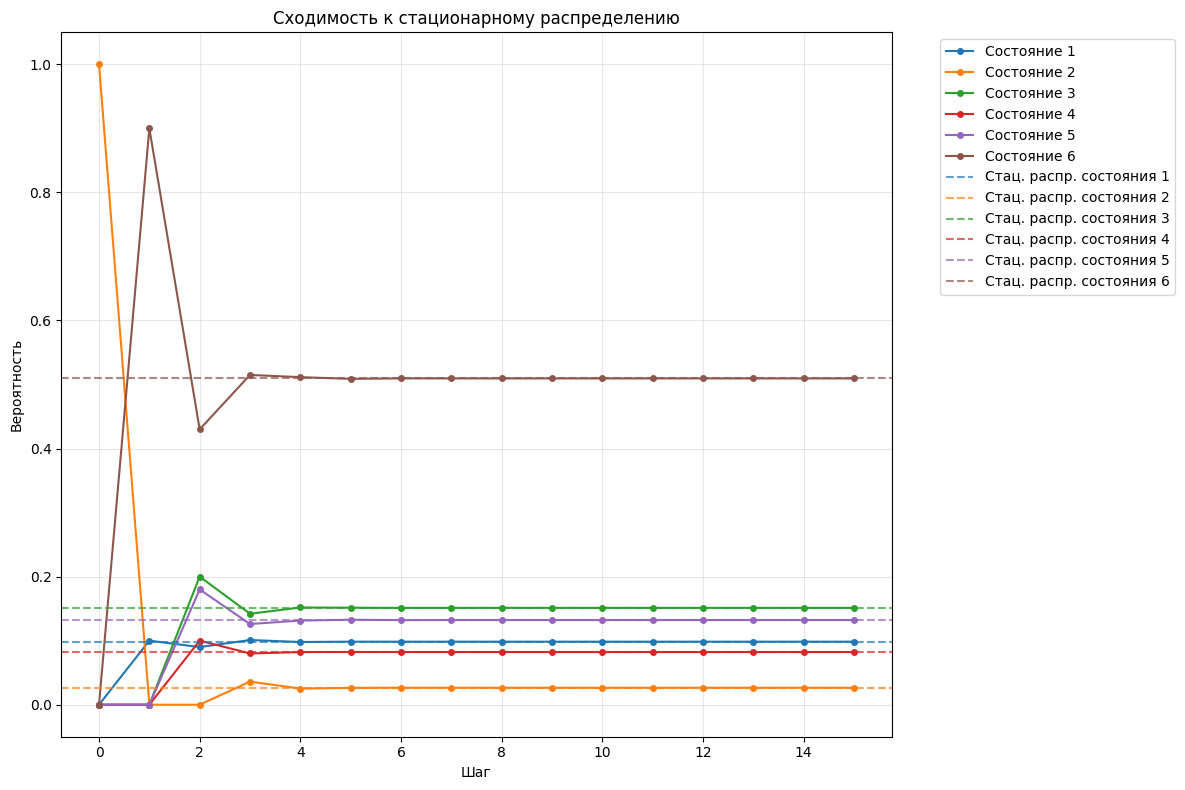

\n--- Итоговая таблица результатов ---
Параметр                       Значение
--------------------------------------------------
Матрица перехода P             6×6
Начальное распределение        [0 1 0 0 0 0]
Распределение после 2 шагов    [0.09 0.   0.2  0.1  0.18 0.43]
Стационарное распределение     [0.09838473 0.02643172 0.15124816 0.08223201 0.13215859 0.50954479]
Сумма стац. распределения      1.0000000000


In [3]:
import matplotlib.pyplot as plt

# --- Визуализация сходимости к стационарному распределению ---
print("\\n--- Визуализация сходимости ---")

# Вычисляем эволюцию распределения
steps = 15
evolution = np.zeros((steps + 1, P.shape[0]))
evolution[0] = P0

for step in range(1, steps + 1):
    evolution[step] = evolution[step - 1] @ P

# Строим график
plt.figure(figsize=(12, 8))
for state in range(P.shape[0]):
    plt.plot(range(steps + 1), evolution[:, state],
             label=f'Состояние {state+1}', marker='o', markersize=4)

# Добавляем линии стационарного распределения
for state in range(P.shape[0]):
    plt.axhline(y=stationary_distribution[state],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][state],
                linestyle='--', alpha=0.7,
                label=f'Стац. распр. состояния {state+1}')

plt.xlabel('Шаг')
plt.ylabel('Вероятность')
plt.title('Сходимость к стационарному распределению')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Таблица результатов ---
print("\\n--- Итоговая таблица результатов ---")
print(f"{'Параметр':<30} {'Значение'}")
print("-" * 50)
print(f"{'Матрица перехода P':<30} {P.shape[0]}×{P.shape[1]}")
print(f"{'Начальное распределение':<30} {P0}")
print(f"{'Распределение после 2 шагов':<30} {P_after_2_steps}")
print(f"{'Стационарное распределение':<30} {stationary_distribution}")
print(f"{'Сумма стац. распределения':<30} {np.sum(stationary_distribution):.10f}")